In [35]:
import os
import pandas as pd
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import ttest_1samp, norm
# Link compartilhável do Google Drive para baixar o Dataset
drive_url = 'https://drive.google.com/uc?id=14m-2aCSFKtjossZPNmrPMBjiao2KxnrO'


gdown.download(drive_url, 'arquivo.csv')

path= os.path.join('.', 'arquivo.csv')

Downloading...
From: https://drive.google.com/uc?id=14m-2aCSFKtjossZPNmrPMBjiao2KxnrO
To: /content/arquivo.csv
100%|██████████| 7.41M/7.41M [00:00<00:00, 104MB/s]


In [18]:
df= pd.read_csv(path)
df.rename(columns={"Unnamed: 0": "ID",
                          "RevolvingUtilizationOfUnsecuredLines": "balance_divided_creditlimit",
                         "NumberOfTime60-89DaysPastDueNotWorse": "number_times_latepay60-89"}, inplace=True)
#Possíveis outliers
df= df[df['age'] >=18 ]
df= df[df['NumberOfTime30-59DaysPastDueNotWorse']<96  ]
df= df[df.iloc[:, 11]<15]

df.dropna(inplace=True)
df_x= df.drop(['SeriousDlqin2yrs', 'ID'], axis=1)
df_y= df["SeriousDlqin2yrs"]

df_x.head()

,balance_divided_creditlimit,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,number_times_latepay60-89,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# **LETRA A**

### **POPULATION distruibution**

14.417115979485258


Text(0.5, 0, 'Age | mean = 51.31')

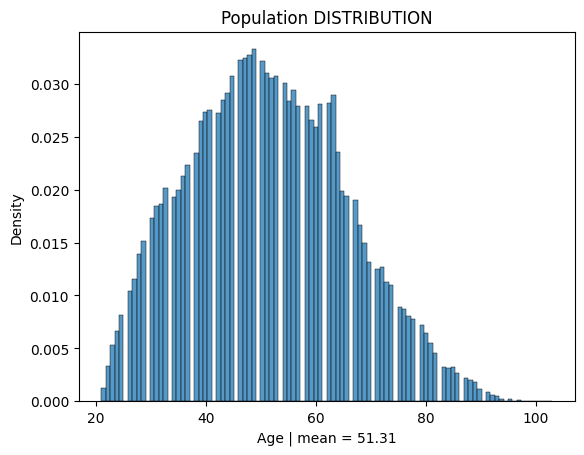

In [19]:
#POPULATION distribution
media_populacao = df['age'].mean()
desvio_populacao = df['age'].std()
print(desvio_populacao)
dados_artificiais = np.random.normal(loc=media_populacao, scale=desvio_populacao, size=1000)
#dados_artificiais, media, desvio
plt.Figure([10,5])
plt.title("Population DISTRIBUTION")
sns.histplot(df['age'], stat='density', label='dados reais')
plt.xlabel(f'Age | mean = {media_populacao:.2f}')


### **Sample distruibution**

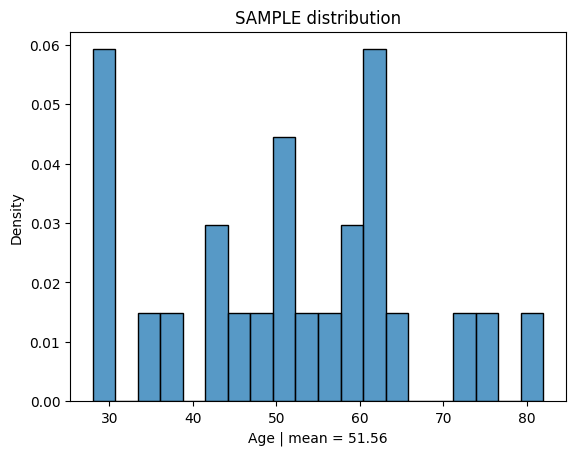

In [ ]:
one_sample= df['age'].sample(25)

plt.Figure([10,5])
plt.title("SAMPLE distribution")
sns.histplot(one_sample, stat='density', bins=20)
plt.xlabel(f'Age | mean = {one_sample.mean():.2f}')
plt.show()

### **Sampling distribution**

Text(0.5, 0, 'Média dos samples: 50.82')

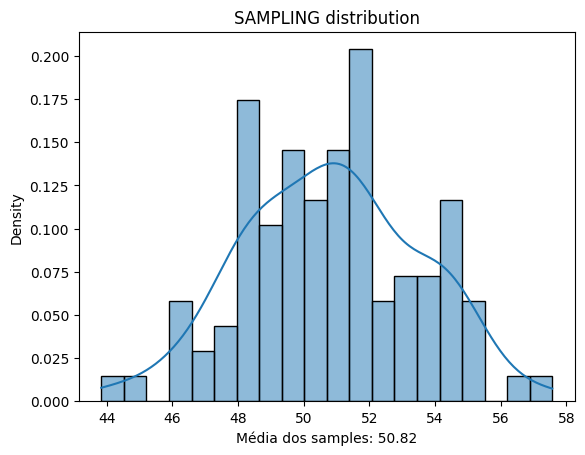

In [ ]:
dt= df['age']
sample_size= 30   #num qtd em cada amostra
num_samples= 100  #num amostras

media_samples= []
sample_z = []

for i in range(num_samples):
  sample= dt.sample(sample_size)
  media_samples.append(sample.mean())

  z_score= (media_populacao - sample.mean())/(desvio_populacao/np.sqrt(sample_size))
  sample_z.append(z_score)


plt.Figure([10,5])
plt.title("SAMPLING distribution")
sns.histplot(media_samples, kde=True, stat='density', bins=20)
plt.xlabel(f"Média dos samples: {np.mean(media_samples):.2f}")



### **Possíveis eventos:**

Probabilidade de uma pessoa ter mais de 58 anos?

In [ ]:
def z_score(X, media, desvio):
  return ((X - media)/desvio)
X= 58
print(f'{(1 - norm.cdf(z_score(X, media_populacao, desvio_populacao)))*100:.2f}', "%")

32.13 %


Probabilidade de uma pessoa ter menos de 75 anos?

In [ ]:
X= 75
print(f'{(norm.cdf(z_score(X, media_populacao, desvio_populacao)))*100:.2f}', "%")

94.98 %


# **LETRA B**

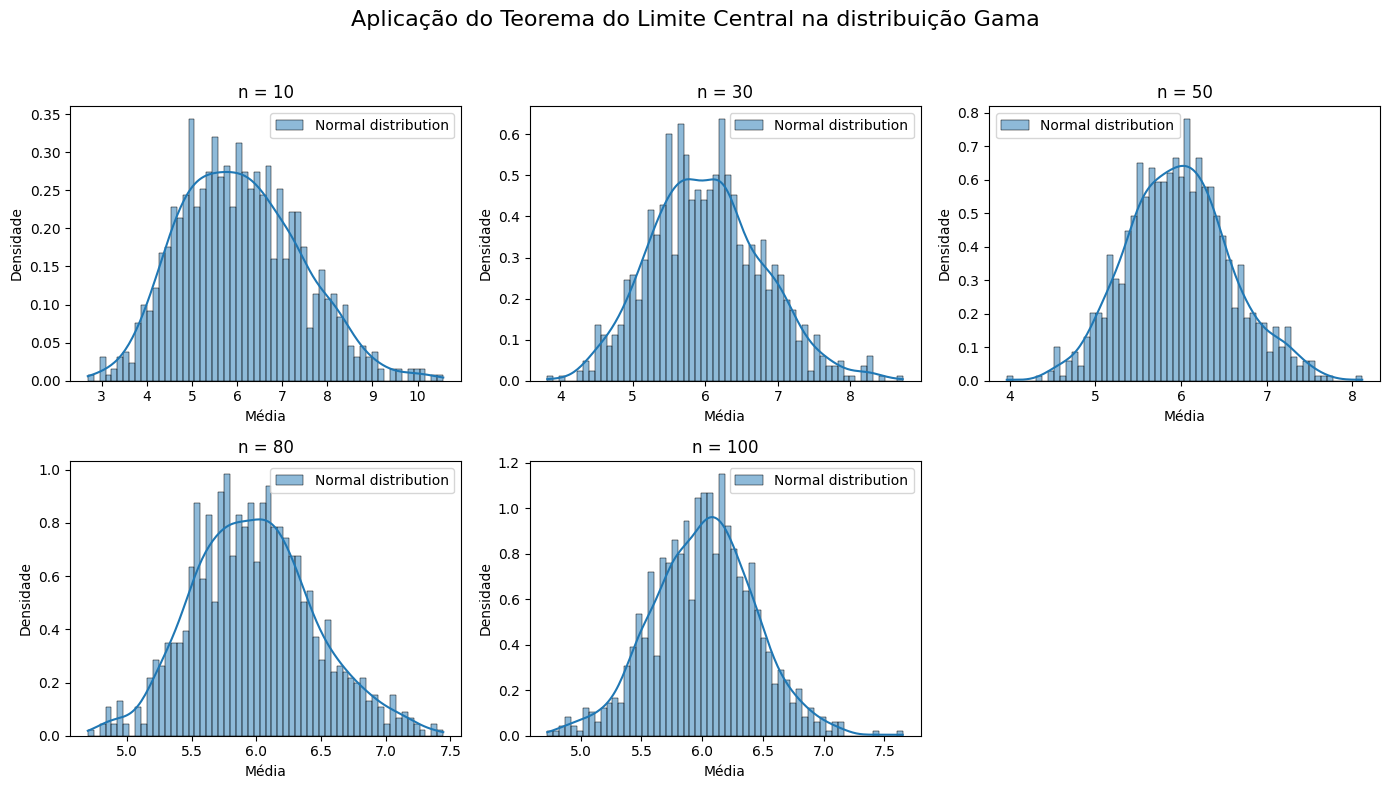

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

alpha = 2.0
beta = 3.0

n_amostras = 1000
sample_size = [10, 30, 50, 80, 100]

# Plot
plt.figure(figsize=(14, 8))

for i, n in enumerate(sample_size):
    amostras = gamma.rvs(a=2, scale=3, size=(n_amostras, n))
    medias = amostras.mean(axis=1)

    plt.subplot(2, 3, i+1)
    sns.histplot(medias, kde=True, stat='density', bins=60, label='Normal distribution')

    plt.title(f'n = {n}')
    plt.xlabel('Média')
    plt.ylabel('Densidade')
    plt.legend()

plt.suptitle('Aplicação do Teorema do Limite Central na distribuição Gama', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
gamma.rvs(a=2, scale=3, size=(n_amostras, n))

(100,)

# **C**

In [9]:
from scipy.stats import binom
p_obs = binom.pmf(4, 5, 0.5)
print(f"Probabilidade de obter exatamente 4 caras: {p_obs:.4f}")
x = np.arange(0, 5 + 1)
extreme_values = [i for i in x if binom.pmf(i, 5, 0.5) <= p_obs]
p_value_bilateral = sum([binom.pmf(i, 5, 0.5) for i in extreme_values])

print(f"Valores: {extreme_values}")
print(f"P-value = {p_value_bilateral:.4f}")

Probabilidade de obter exatamente 4 caras: 0.1562
Valores: [np.int64(0), np.int64(1), np.int64(4), np.int64(5)]
P-value = 0.3750


# **D**

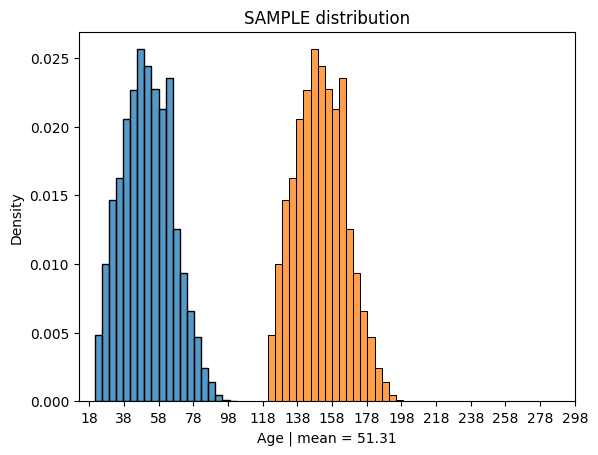

In [12]:
dato=df['age']
plt.Figure([20,5])
plt.title("SAMPLE distribution")
sns.histplot(dato, stat='density', bins=20)
sns.histplot(dato+100, stat='density', bins=20)
plt.xlabel(f'Age | mean = {dato.mean():.2f}')
plt.xticks(np.arange(18, 300, 20))
plt.show()

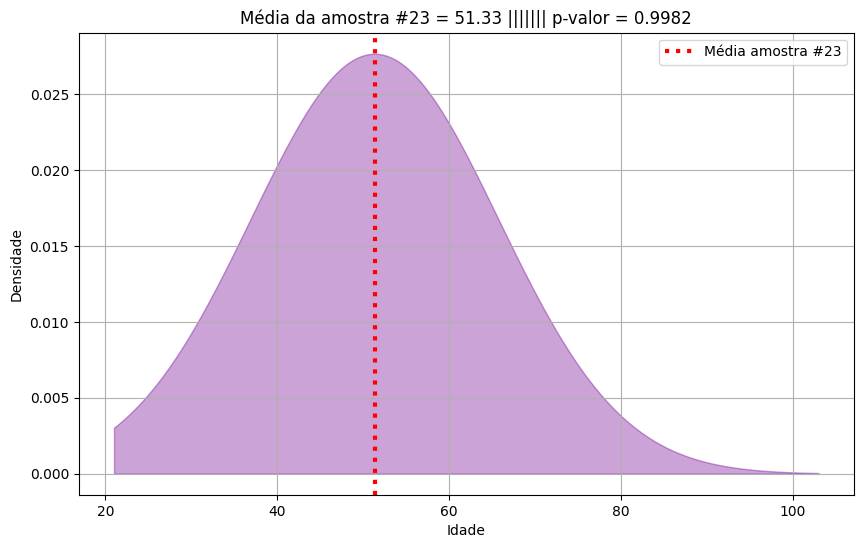

np.float64(0.93)

In [34]:

idade = df['age'].dropna()

n_amostras = 100
tamanho_amostra = 3

amostras_azul = np.random.choice(idade, size=(n_amostras, tamanho_amostra), replace=True)

p_values = []
for amostra in amostras_azul:
    stat, p = ttest_1samp(amostra, popmean=media_populacao)
    p_values.append(p)

p_values = np.array(p_values)
falsos_negativos = np.sum(p_values > 0.05)
taxa_falso_negativo = falsos_negativos / n_amostras

idx_exemplo = np.argmax(p_values)
media_exemplo = np.mean(amostras_azul[idx_exemplo])
x = np.linspace(idade.min(), idade.max(), 500)
pdf_vermelha = norm.pdf(x, loc=media_populacao, scale=desvio_padrao)
pdf_azul = norm.pdf(x, loc=idade.mean(), scale=desvio_padrao)

plt.figure(figsize=(10, 6))

plt.axvline(media_exemplo, color='red', linestyle=':', lw=3, label=f'Média amostrar #{idx_exemplo}')
plt.fill_between(x, 0, pdf_vermelha, color='red', alpha=0.2)
plt.fill_between(x, 0, pdf_azul, color='blue', alpha=0.2)
plt.title(f"Média da amostra #{idx_exemplo} = {media_exemplo:.2f} ||||||| p-valor = {p_values[idx_exemplo]:.4f}")
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

taxa_falso_negativo
